In [1]:
# Import the necessary modules

from PIL import Image
import numpy as np
from pathlib import Path

from constants import *
from vector3 import *
from raytrace import *
from scene import *
from surfaces import *
from lights import *
from colliders import *
from materials import *


In [2]:
# Create some materials to use

gold_metal = Material(diff_color = rgb(1., .572, .184), n = vec3(0.15+3.58j, 0.4+2.37j, 1.54+1.91j), roughness = 0.0, spec_c = 0.2, diff_c = 0.8, max_ray_depth = 3)
bluish_metal = Material(diff_color = rgb(0.0, 0, 0.1), n = vec3(1.3+1.91j, 1.3+1.91j, 1.4+2.91j), roughness = 0.2,spec_c = 0.5, diff_c = 0.3, max_ray_depth = 3)

blue_glass = RefractiveMaterial(diff_color = rgb(1.0, 1.0, 1.0), n = vec3(1.5 + 4e-8j,1.5 +  4e-8j,1.5 +  0.j), roughness = 0.0,spec_c = 0.2, diff_c = 0.8, max_ray_depth = 3)
green_glass = RefractiveMaterial(diff_color = rgb(1.0, 1.0, 1.0), n = vec3(1.5 + 4e-8j,1.5 + 0.j,1.5 + 4e-8j), roughness = 0.0,spec_c = 0.2, diff_c = 0.8, max_ray_depth = 3)
red_glass = RefractiveMaterial(diff_color = rgb(1.0, 1.0, 1.0), n = vec3(1.5 + 0.j,1.5 +  5e-8j,1.5 +  5e-8j), roughness = 0.0,spec_c = 0.2, diff_c = 0.8, max_ray_depth = 3)

img = Image.open(Path("images/checkered_floor_linear_sRGB.png"))
checkered_floor = np.asarray(img)/256.
checkered_floor_material = Material(texture = checkered_floor, repeat = 2.0, diff_color = rgb(1., 1., 1.), n = vec3(1.5, 1.5, 1.5), roughness = 0.2, spec_c = 0.5, diff_c = 0.5, max_ray_depth = 3)

In [3]:
# Import skyboxes

img = Image.open(Path("images/miramar_linear_sRGB.png"))
miramar = np.asarray(img)/256.


img = Image.open(Path("images/stormydays_linear_sRGB.png"))
stormydays = np.asarray(img)/256.


Took 0.6782128810882568


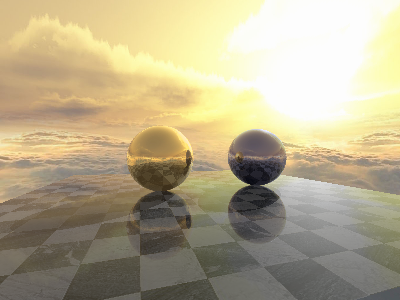

In [4]:
# example 1
checkered_floor_material = Material(texture = checkered_floor, repeat =4.0, diff_color = rgb(1., 1., 1.), n = vec3(1.2+ 0.3j, 1.2+ 0.3j, 1.1+ 0.3j), roughness = 0.2, spec_c = 1.3, diff_c = 1.3, max_ray_depth = 5)

Sc = Scene(ambient_color = rgb(0.05, 0.05, 0.05))

angle = -np.pi/2 * 0.3
Sc.add_Camera(Camera(screen_width = 400 ,screen_height = 300, position = vec3(2.5*np.sin(angle), 0.25, 2.5*np.cos(angle)  -1.5 ), look_at = vec3(0., 0.25, -3.)))

Sc.add_DirectionalLight(Ldir = vec3(0.52,0.45, -0.5),  color = rgb(0.15, 0.15, 0.15))

Sc.add_Surface(Sphere(material = gold_metal, center = vec3(-.75, .1, -3.),radius =  .6))
Sc.add_Surface(Sphere(material = bluish_metal, center = vec3(1.25, .1, -3.), radius = .6))

Sc.add_Surface(Plane(material = checkered_floor_material,  center = vec3(0, -0.5, -3.0), width = 6.0,height = 6.0, pu = vec3(1.0, 0, 0), pv = vec3(0, 0, -1.0)))



Sc.add_SkyBox(stormydays)
Sc.render()

Took 1.2190828323364258


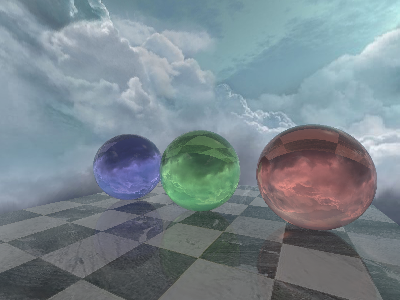

In [5]:
# example 2

Sc = Scene()
angle = np.pi/2 * 0.3
Sc.add_Camera(Camera(screen_width = 400 ,screen_height =300, position = vec3(2.5*np.sin(angle), 0.25, 2.5*np.cos(angle)  -1.5 ), look_at = vec3(0., 0.25, -1.5)))


Sc.add_DirectionalLight(Ldir = vec3(0.0,0.5, 0.5),  color = rgb(0.5, 0.5, 0.5))

checkered_floor_material = Material(texture = checkered_floor, repeat = 2.0, diff_color = rgb(1., 1., 1.), n = vec3(1.2+ 0.3j, 1.2+ 0.3j, 1.1+ 0.3j), roughness = 0.2, spec_c = 0.3, diff_c = 0.7, max_ray_depth =3)

Sc.add_Surface(Sphere(material = blue_glass, center = vec3(-1.2, 0.0, -1.5), radius = .5, shadow = False))
Sc.add_Surface(Sphere(material = green_glass, center = vec3(0., 0.0, -1.5), radius = .5, shadow = False))
Sc.add_Surface(Sphere(material = red_glass, center = vec3(1.2, 0.0, -1.5), radius = .5, shadow = False))

Sc.add_Surface(Plane(material = checkered_floor_material,  center = vec3(0, -0.5, -1.5), width = 4.0,height = 4.0, pu = vec3(1.0, 0, 0), pv = vec3(0, 0, -1.0)))


Sc.add_SkyBox(miramar)
Sc.render()

Took 1.7751379013061523


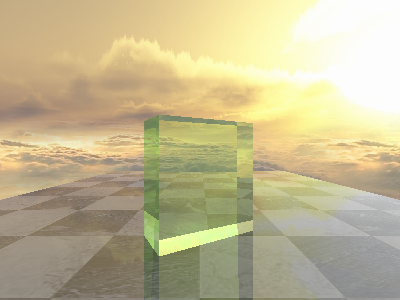

In [6]:
# example 3


Sc = Scene()
Sc.add_Camera(Camera(screen_width = 400 ,screen_height = 300, position = vec3(0., 0.25, 1. ), look_at = vec3(0., 0.25, -3.) ))
Sc.add_DirectionalLight(Ldir = vec3(0.0,0.5, 0.5),  color = rgb(0.5, 0.5, 0.5))

checkered_floor_material = Material(texture = checkered_floor, repeat = 2.0, diff_color = rgb(1.0, 1., 1.), n = vec3(2.6, 2.6, 2.6), roughness = 0.2, spec_c = 0.3, diff_c = 0.7, max_ray_depth = 5)
green_glass = RefractiveMaterial(diff_color = rgb(1.0, 1.0, 1.0), n = vec3(1.5 + 4e-8j,1.5 + 0.j,1.5 + 4e-8j), roughness = 0.0,spec_c = 0.2, diff_c = 0.8, max_ray_depth = 5)

Sc.add_Surface(Plane(material = checkered_floor_material,  center = vec3(0, -0.5, -3.0), width = 6.0,height = 6.0, pu = vec3(1.0, 0, 0), pv = vec3(0, 0, -1.0)))
cb = Cube( material = green_glass, center = vec3(0.00, 0.0, -0.8), width = 0.9,height = 1.0, length = 0.4, shadow = False)
cb.rotate(θ = 30, u = vec3(0,1,0))
Sc.add_Surface(cb)


Sc.add_SkyBox(stormydays)
Sc.render()